llama13b-chat
codellama13b-inst.
mistral7b-instv0.1
mistral7b-instv0.2
mixtral8x7b-instv0.1


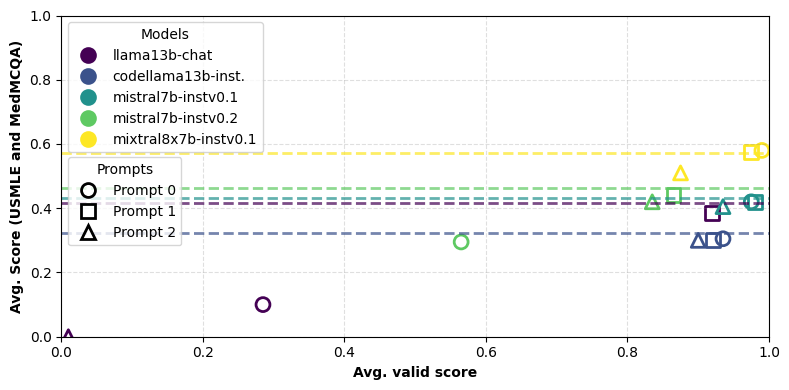

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ["llama13b-chat", "codellama13b-inst.", "mistral7b-instv0.1", "mistral7b-instv0.2", "mixtral8x7b-instv0.1"]
data = {
    "llama13b-chat": [[0.14, 0.05, 0.43, 0.15], [0.89, 0.39, 0.95, 0.38], [0.02, 0, 0, 0]],
    "codellama13b-inst.": [[0.91, 0.29,0.96, 0.32], [0.88, 0.29, 0.962, 0.31], [0.87, 0.28,0.93, 0.32]],
    "mistral7b-instv0.1": [[0.98, 0.44, 0.97,0.40], [0.99, 0.43, 0.97,0.41], [0.91, 0.39, 0.96, 0.42]],
    "mistral7b-instv0.2": [[0.66, 0.35, 0.47,0.24], [0.88, 0.48, 0.85,0.40], [0.85, 0.46, 0.82, 0.38]],
    "mixtral8x7b-instv0.1": [[0.99, 0.63, 0.99,0.53], [0.98, 0.63,0.97, 0.52], [0.85, 0.54, 0.9, 0.48]]
}

data_horizontal_lines = {
    "llama7b": {"USMLE": [0.295, 0.323, 0.303], "MedMCQA": [0.25, 0.343, 0.385]},
    "llama13b": {"USMLE": [0.342, 0.375, 0.39], "MedMCQA": [0.328, 0.405, 0.429]},
    "llama70b": {"USMLE": [0.434, 0.574], "MedMCQA": [0.428, 0.536]},
    "llama7b-chat": {"USMLE": [0.386, 0.422], "MedMCQA": [0.394,  0.38]},
    "llama13b-chat": {"USMLE": [0.422, 0.438], "MedMCQA": [0.375,  0.432]},
    "llama70b-chat": {"USMLE": [0.423, 0.434], "MedMCQA": [0.418, 0.449]},
    "codellama13b-inst.": {"USMLE": [0.317,  0.296], "MedMCQA": [0.335,  0.343]},
    "mistral7b": {"USMLE": [0.515, 0.513, 0.499], "MedMCQA": [0.449, 0.497, 0.508]},
    "mixtral8x7b": {"USMLE": [0.594, 0.604, 0.603], "MedMCQA": [0.546, 0.592, 0.589]},
    "mistral7b-instv0.1": {"USMLE": [0.422, 0.447], "MedMCQA": [0.408,  0.447]},
    "mistral7b-instv0.2": {"USMLE": [0.47,  0.497], "MedMCQA": [0.443,  0.447]},
    "mixtral8x7b-instv0.1": {"USMLE": [0.565,  0.647], "MedMCQA": [0.503,  0.571]},
    "code-llama7b": {"USMLE": [0.217, 0.24, 0.053], "MedMCQA": [0.219, 0.303, 0.1]},
    "code-llama13b": {"USMLE": [0.287, 0.01], "MedMCQA": [0.271, 0.34]},
    "code-llama7b-inst.": {"USMLE": [0.31, 0.293, 0.288], "MedMCQA": [0.35, 0.323, 0.318]},
    
}

# Different markers for each prompt
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Different colors for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# add xlim and ylim 0-1
plt.xlim((0, 1))
plt.ylim((0, 1))

# Plotting the points
for model_idx, model in enumerate(models):
    for prompt in range(len(data[model])):
        # Extracting specific scores for each prompt
        valid_score1 = data[model][prompt][0]
        valid_score2 = data[model][prompt][2]
        usmle_score = data[model][prompt][1]
        medmcqa_score = data[model][prompt][3]

        # Calculating the average of USMLE and MedMCQA
        avg_usmle_medmcqa = (usmle_score + medmcqa_score) / 2

        valid_score = (valid_score1 + valid_score2) / 2

        # Plotting each point with different marker and color
        # increase width of edge to make it more visible
        ax.scatter(valid_score, avg_usmle_medmcqa, fc='none', ec=colors[model_idx], marker=markers[prompt], s=100, linewidths=2)
        #ax.scatter(valid_score, avg_usmle_medmcqa, fc='none', ec=colors[model_idx], marker=markers[prompt], s=100)

# add horizontal lines for the maximum of USMLE and MedMCQA averaged scores from the data_horizontal_lines
c =0
for model, v in data_horizontal_lines.items():
    if model in models:
        max_USMLE_score = np.mean(v["USMLE"])
        max_MedMCQA_score = np.mean(v["MedMCQA"])
        avg_score = (max_USMLE_score + max_MedMCQA_score) / 2
        print(model)

    
        ax.axhline(y=avg_score, color=colors[c], linestyle='--', alpha=.7, linewidth = 2)
        c+=1

# Enhancing the plot
plt.xlabel('Avg. valid score', fontweight='bold')
plt.ylabel('Avg. Score (USMLE and MedMCQA)', fontweight='bold')
#plt.title('Scatter Plot of Valid and Average USMLE & MedMCQA Scores for Each Model-Prompt')

# Creating a custom legend
# Legend for models (colors)
#legend1 = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color in colors]
#legend1_labels = models
#
## Legend for prompts (markers)
## the markers should be the same as the ones used in the scatter plot
## i.e. no filled markers
#legend2 = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='', markersize=10) for marker in markers]
#legend2_labels = [f'Prompt {i}' for i in range(len(markers))]
#
## Adding legends to the plot
#legend1 = plt.legend(legend1, legend1_labels, title="Models", loc='upper left', bbox_to_anchor=(0.0, 1))
#ax.add_artist(legend1)
#plt.legend(legend2, legend2_labels, title="Prompts", loc='upper left', bbox_to_anchor=(0, 0.58))

legend1 = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10, markeredgewidth=2) for color in colors]
legend1_labels = models

# Legend for prompts (markers)
# Here we use unfilled markers with a black edge color
legend2 = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='', markersize=10, markeredgewidth=2, markerfacecolor='none') for marker in markers]
legend2_labels = [f'Prompt {i}' for i in range(len(markers))]

# Adding legends to the plot
legend1 = plt.legend(legend1, legend1_labels, title="Models", loc='upper left', bbox_to_anchor=(0.0, 1))
ax.add_artist(legend1)
plt.legend(legend2, legend2_labels, title="Prompts", loc='upper left', bbox_to_anchor=(0, 0.58))

plt.tight_layout()
plt.show()
